In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import seaborn as sns

### 3.1

In [2]:
gold_df = pd.read_csv('Gold/GOLD.csv');
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 9 columns):
Date        512 non-null object
Price       512 non-null int64
Open        512 non-null int64
High        512 non-null int64
Low         512 non-null int64
Vol.        512 non-null object
Change %    512 non-null object
Pred        411 non-null float64
new         512 non-null float64
dtypes: float64(2), int64(4), object(3)
memory usage: 36.1+ KB


In [3]:
x_train,x_test,y_train,y_test = train_test_split(gold_df[['Open','High','Low','Price']][:411],gold_df.Pred[:411],test_size  = 0.2)
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [4]:
print("Train:", model.score(x_train, y_train))
print("Test:", model.score(x_test, y_test))

Train: 1.0
Test: 1.0


In [5]:
print("Coefficients of OHLC are",model.coef_)

Coefficients of OHLC are [ 3. -1. -4.  2.]


In [6]:
# filling the missing values of the pred column
temp_df = gold_df.iloc[411:]
new_pred = model.predict(temp_df[['Open','High','Low','Price']])
dropped_df = gold_df.dropna()
whole_col = np.hstack((dropped_df.Pred.values,new_pred))
gold_df.Pred = whole_col

In [7]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 9 columns):
Date        512 non-null object
Price       512 non-null int64
Open        512 non-null int64
High        512 non-null int64
Low         512 non-null int64
Vol.        512 non-null object
Change %    512 non-null object
Pred        512 non-null float64
new         512 non-null float64
dtypes: float64(2), int64(4), object(3)
memory usage: 36.1+ KB


In [8]:
new_model = LinearRegression()
new_x, new_y = gold_df[['Open','High','Low','Price']].values, gold_df.new.values
new_model.fit(new_x,new_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
print(new_model.score(new_x,new_y))
# predicting values for new columns
gold_df['new_predict'] = new_model.predict(new_x)

0.9999886649319772


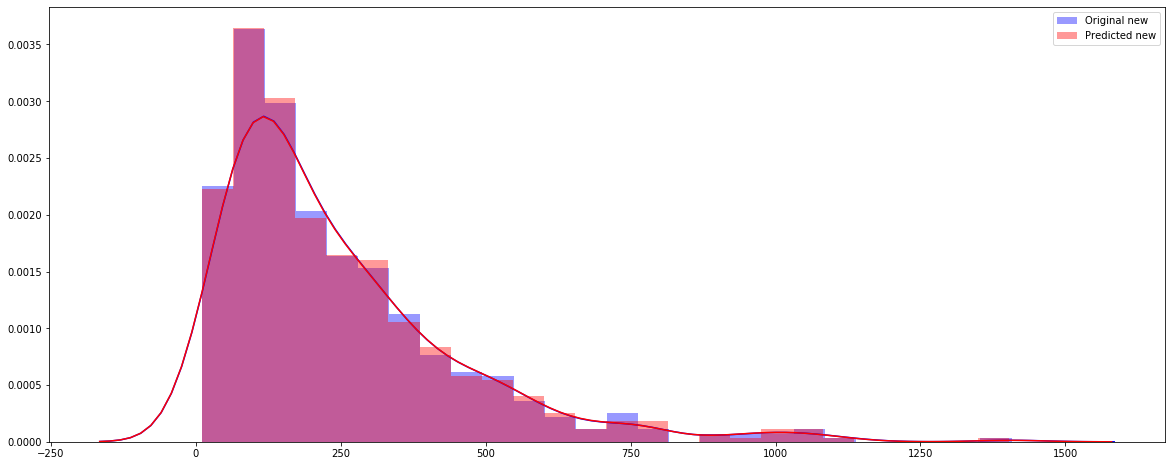

In [10]:
fig,ax = plt.subplots(figsize =(20,8))
ax = sns.distplot(gold_df.new,color='b',label='Original new')
ax = sns.distplot(gold_df.new_predict,color='r', label='Predicted new')
ax.set_xlabel('')
ax.legend()

In [11]:
pred_score_linear = model.score(new_x,gold_df.Pred)
new_score_linear = new_model.score(new_x,gold_df.new)

In [12]:
##POLYNOMIAL CALCULATIONS
poly = PolynomialFeatures()
x_poly = poly.fit_transform(new_x)
model.fit(x_poly,gold_df.Pred)
new_model.fit(x_poly,gold_df.new)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
pred_score_poly = model.score(x_poly,gold_df.Pred)
new_score_poly = new_model.score(x_poly,gold_df.new)

In [14]:
print("For Pred Column :")
print("Linear model score:", pred_score_linear)
print("Polynomial model score:", pred_score_poly)
print("\n For New Column :")
print("Linear model score:", new_score_linear)
print("Polynomial model score:", new_score_poly)

For Pred Column :
Linear model score: 1.0
Polynomial model score: 1.0

 For New Column :
Linear model score: 0.9999886649319772
Polynomial model score: 0.9999999919827844


**The score of new column calculated by polynomial function is greater than that of the simple linear function.
Therefore The Pred Column is Linear Function and the New Column is Polynomial Funciton.**

### 3.2

In [15]:
ndf = pd.read_csv('Nifty50.csv')
infy_df = pd.read_csv('INFY.csv')

ndf.Date = pd.to_datetime(ndf.Date)
infy_df.Date = pd.to_datetime(infy_df.Date)
ndf.set_index('Date',inplace= True)
infy_df.set_index('Date',inplace= True)

infy_df = infy_df[infy_df.Series == 'EQ']

ndf['Returns'] = ndf.Close.pct_change().dropna()*100
infy_df['Returns'] = infy_df['Close Price'].pct_change().dropna()*100

In [16]:
index = ndf.Returns.values.reshape(-1, 1)
stock = infy_df.Returns.values.reshape(-1, 1)

index = index[1:]
stock = stock[1:]

reg_model = LinearRegression()
reg_model.fit(index[-90:],stock[-90:])
beta_3_months = reg_model.coef_
print("Daily beta value for past 3 months:",beta_3_months[0][0])

Daily beta value for past 3 months: 0.6489303928774469


In [17]:
predic = reg_model.predict(index)

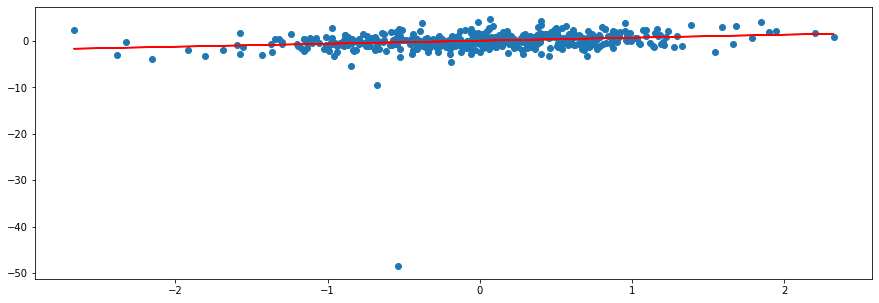

In [18]:
plt.figure(figsize=(15,5))
plt.scatter(index,stock)
plt.plot(index,predic,'r')

In [19]:
ndf['monthly_price'] = ndf.Close.rolling(30).mean()
infy_df['monthly_price'] = infy_df['Close Price'].rolling(30).mean()
ndf['monthly_returns'] = ndf.monthly_price.pct_change()*100
infy_df['monthly_returns'] = infy_df.monthly_price.pct_change()*100

In [20]:
print(ndf.shape)
print(infy_df.shape)
# infy_df.info()

(494, 9)
(494, 17)


In [21]:
index = []
for i in range(0,ndf.shape[0],30):
    index.append(ndf.monthly_returns.iloc[i])

stock = []
for i in range(0,ndf.shape[0],30):
    stock.append(infy_df.monthly_returns.iloc[i])

In [22]:
index = index[1:]
stock = stock[1:]

reg_model.fit(np.asarray(index).reshape(-1,1),np.asarray(stock).reshape(-1,1))
monthly_beta = reg_model.coef_
print("Monthly beta:",monthly_beta[0][0])

Monthly beta: 0.3420156285044489


In [23]:
predic = reg_model.predict(np.asarray(index).reshape(-1,1))

Text(0.5, 1.0, 'Monthly Beta Calculation')

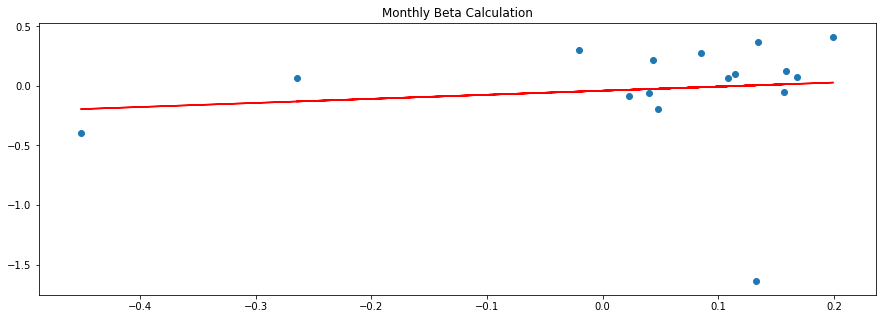

In [24]:
plt.figure(figsize=(15,5))
plt.scatter(index,stock)
plt.plot(index,predic,'r')
plt.title('Monthly Beta Calculation')

### In both type of calculations (Monthly and daily) the Beta values are less than 1, which indicates that the stocks of INFY is less volatile.
### If the beta value happens to be negative then it is indication that the stock is moving opposite to the market.